##  第一周：pytorch的基础概念：Tensor ，Variable， autogrand ， 计算图等

### torch.Tensor的常用属性：
- data：张量的值
- dtype:张量的数据类型
- shape：张量的形状
- device：张量的存储的位置
- requires_grad：是否进行梯度下降
- grad：保存梯度值
- grad_fn：记录创建该张量时所用的方法（函数）
- is_leaf：是否为叶子节点

### 01、创建张量的三种方式

#### 第一种：使用数组创建

torch.tensor(data,dtype=None,device=None,requiesr_grad=False)

In [6]:
import numpy as np
import torch

array=np.ones((3,3))
torch.tensor(array,device='cuda',requires_grad=True,)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0', dtype=torch.float64,
       requires_grad=True)

In [7]:
torch.from_numpy(array)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

#### 第二种：依据数值创建

带like的输入为一个张量，输出为与输入同形状的张量

torch.zeros(*size,out=None,dtype=None,layout=torch.strided,device=None,requires_grad=None)

In [8]:
t=torch.zeros((3,3))

In [9]:
torch.ones_like(t)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [10]:
torch.full((3,3),10)

tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])

In [11]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

#### 第三种：依概率分布创建张量
离散正态分布：
torch.noraml(mean,std,out=None)：
- maen:均值
- std:方差

均匀分布：
torch.rand(*sizes,out=None)：从区间[0, 1)的均匀分布中抽取的一组随机数,返回一个张量,张量的形状由参数sizes定义。

- sizes(元组):定义了输出张量的形状

标准正态分布：
torch.randn(*sizes, out=None)：从标准正态分布（均值为0，方差为1，即高斯白噪声）中抽取的一组随机数，返回一个张量，张量的形状由参数sizes定义。
- sizes(元组):定义了输出张量的形状

线性间距向量：
torch.linspace(start, end, steps=100, out=None) ：返回一个1维张量，包含在区间start和end上均匀间隔的step个点。输出张量的长度由steps决定

In [12]:
torch.normal(0,1,size=(4,))

tensor([-0.5818,  0.8293, -1.6850,  0.5061])

###  02、张量的操作
- 张量的操作：拼接，切分，索引，变换
- 张量的数学运算
- 线性回归

#### 张量的拼接：

torch.cat(tensors,dim=0,out=None):将张量按照维度dim来拼接
- tensors:张量序列
- dim:要拼接的维度


torch.stack(tensors,dim=0,out=None):在新创建的维度dim上进行拼接
- tensors:张量序列
- dim:要拼接的维度

对比：cat不会扩展张量的维度，stack会扩展张量的维度

In [13]:
t=torch.ones((2,3))
torch.cat([t,t],dim=0)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [14]:
torch.cat([t,t],dim=1)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [15]:
torch.stack([t,t],dim=0)

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

#### 张量的切分：

torch.chunk(input,chunks,dim=0):将张量按维度进行平均切分，返回一个张量列表
- 若不能整除，最后一份张量小于其他张量
- inptu:要切分的张量
- chunks：要切分的份数
- dim：要切分的维度

torch.split(tensor,split_size_or_sections,dim=0):将张量按维度进行切分
- tensor：要切分的张量
- split_size_or_sections:为int时表示每一份的长度，为list时，按list元素切分
- dim：要切分的维度

In [16]:
t=torch.ones((2,5))
torch.chunk(t,2,dim=0)

(tensor([[1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1.]]))

In [17]:
t=torch.ones((6,6))
torch.split(t,3)

(tensor([[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]))

In [18]:
list=[1,2,3]
torch.split(t,list)

(tensor([[1., 1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]))

####  张量索引：

torch.index_select(input,dim,index,out=None):在dim维度上，按index索引数据，返回依index索引数据拼接的张量
- imput：要索引的张量
- dim：要索引的维度
- index：要索引数据的序号

torch.masked_select(input,mask,out=None):按mask中的True进行索引，返回一个一维张量
- input：要索引的张量
- 与input同形状的布尔类型的张量

In [22]:
t=torch.randint(0,6,size=(3,3))
idx=torch.tensor([0,2])
torch.index_select(t,dim=0,index=idx)

tensor([[2, 5, 5],
        [0, 3, 2]])

In [25]:
t=torch.randint(0,6,size=(3,3))
print(t)
mask=t.ge(5) # ge大于或者等于
print(mask)
torch.masked_select(t,mask)

tensor([[1, 0, 5],
        [1, 1, 5],
        [4, 2, 5]])
tensor([[False, False,  True],
        [False, False,  True],
        [False, False,  True]])


tensor([5, 5, 5])

#### 张量的变换：

torch.reshape(input,shape):变换张量的形状
- input:要变换的张量
- shape(元组)：张量的形状
- 注意：当张量在内存中是连续时，新张量与input张量共享内存

torch.tanspose(input,dim0,dim1):交换张量的两个维度
- input：要变换的张量
- dim0:要交换的维度
- dim1：要交换的维度

torch.t(input):2维张量装置，对于矩阵而言，
- 等价于：torch.transpose(input,0,1)，input为2维张量

torch.squeeze(input,dim=None,out=None):压缩长度为1的维度
- dim：若为None，移除所有长度为1的轴，若指定维度，当且仅该轴长度为1时可以被移除

torch.unsequeeze(input,dim=None,out=None):依据dim扩展维度
- dim：扩展的维度

In [26]:
t=torch.randperm(8)
torch.reshape(t,(2,4))

tensor([[1, 5, 2, 6],
        [4, 7, 3, 0]])

In [27]:
torch.reshape(t,(-1,4)) # -1的值为：8/4=2

tensor([[1, 5, 2, 6],
        [4, 7, 3, 0]])

In [28]:
torch.reshape(t,(-1,2,2))  # -1的值为：8/2/2=2

tensor([[[1, 5],
         [2, 6]],

        [[4, 7],
         [3, 0]]])

In [32]:
t=torch.randn((1,2,3,1))
print(t.shape) 
t_0=torch.squeeze(t)
print(t_0.shape)# 为1的被压缩
t_1=torch.squeeze(t,dim=0)
print(t_1.shape)# 0维的为1被压缩
t_2=torch.squeeze(t,dim=1)
print(t_2.shape)# 1维不为1不能被压缩

torch.Size([1, 2, 3, 1])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3, 1])


#### 张量的数学运算
第一种：加减乘除

torch.add(input,alpha=1,other,out=None):逐元素计算input+alpha*other

torch.addcdiv(input,value=1,tensor1,tensor2,out=None)：加法结合除法,input+value*(tensor1/tensor2)

torch.addcmul(input,value=1,tensor1,tensor2,out=None)：加法结合乘法,input+value*(tensor1*tensor2)

torch.sub()

torch.div()

torch.mul()

第二种：对数，指数，幂函数

torch.log(input,out=None)

torch.log10(input,out=None)

torch.log2(input,out=None)

torch.exp(input,out=None)

torch.pow()

第三种：三角函数

torch.abs(input,out=None)

torch.acos(input,out=None)

torch,cosh(input,out=None)

torch.cos(input,out=None)

torch.asin(input,out=None)

torch.atan(input,out=None)

torch.atan2(input,other,out=None)

### 03、线性回归
线性回归：分析一个变量与另外一（多）个变量之间关系的方法

求解步骤：
- 1.确定模型：y=wx+b
- 2.选择损失函数：MSE（均方差）
- 3.求解梯度并更新

初始化w tensor([2.2844], requires_grad=True)
初始化b tensor([0.], requires_grad=True)


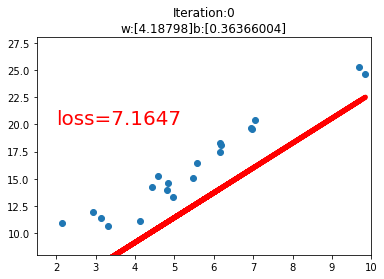

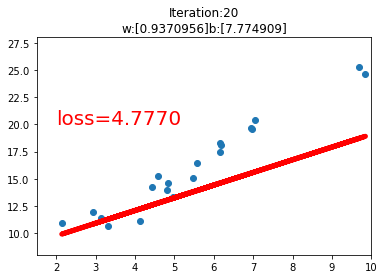

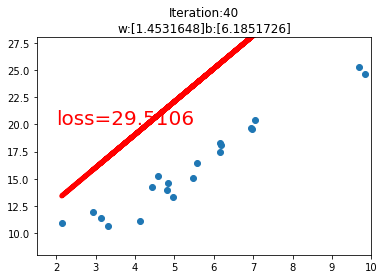

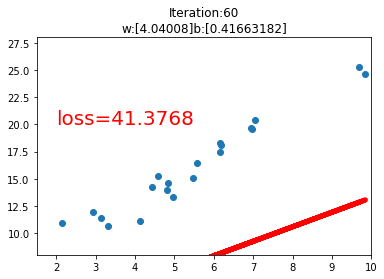

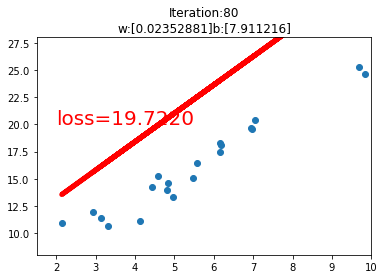

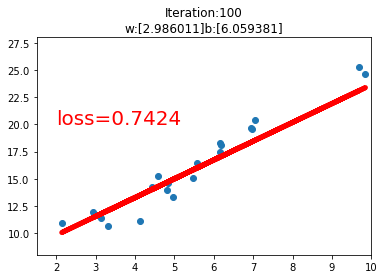

In [43]:
import torch
from matplotlib import pyplot as plt
import numpy as np
torch.manual_seed(10)
# 学习率
lr=0.1
# 创建训练参数
x=torch.rand(20,1)*10 # tensor shape=(20,1)
# print(x)
y=2*x+(5+torch.randn(20,1)) # tensor shape=(20,1)，torch.randn(20,1)为添加的高斯噪声
# print(y)
# 构建线性回归参数：随机初始化w，定值初始化b=0
w=torch.randn((1),requires_grad=True)
print('初始化w',w)
b=torch.zeros((1),requires_grad=True)
print('初始化b',b)
for iteration in range(1000):
    # 前向传播
    wx=torch.mul(w,x)
    y_pred=torch.add(wx,b)
    
    # 计算loss，均方差，0.5是为了求导方便添加的
    loss=(0.5*(y-y_pred)**2).mean()
    
    # 反向传播:会把计算的梯度值存放到grad属性中
    loss.backward()
    
    # 更新参数：如果我们想要修改tensor的数值，但是又不希望被autograd记录，那么我么可以对tensor.data进行操作
    # 接下来使用被修改过的值进行计算
    b.data.sub_(lr*b.grad)
    w.data.sub_(lr*w.grad)
    
    # 绘图
    if iteration%20==0:
        # 使用numpy()函数返回一个numpy形式的数组
        # 使用scatter绘制散点图，其中x和y必须是长度相同的数组序列，对应x轴和y轴坐标
        plt.scatter(x.data.numpy(),y.data.numpy())
        # 使用plot绘制直线(通过给出的点绘制直线)，其中x轴数据，y轴数据，指定线条的颜色，指定线条的宽度
        plt.plot(x.data.numpy(),y_pred.data.numpy(),'r-',lw=5)
        # 2,20是位置，展示的值，字体的颜色和粗细参数
        plt.text(2,20,'loss=%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        # 数轴的展示范围
        plt.xlim(1.5,10)
        plt.ylim(8,28)
        # 图的标题
        plt.title("Iteration:{}\nw:{}b:{}".format(iteration,w.data.numpy(),b.data.numpy()))
        plt.pause(0.5)
        
        if loss.data.numpy()<1:
            break
        
    

### 04、计算图

- 计算图是用来描述运算的有向无环图
- 计算图有两个主要元素：节点（Node），边（Edge）
- 节点表示数据，如：向量，矩阵，张量
- 边表示运算：如：加，减，乘，除，卷积等


用计算图来表示：y=(x+w) * (w+1)

- a=x+w
- b=w+1
- y=a+b

从下面的图可以看出，对w的求导，就是找到每条到w的路径进行求导，相同路径的值相乘，不同路径的值相加

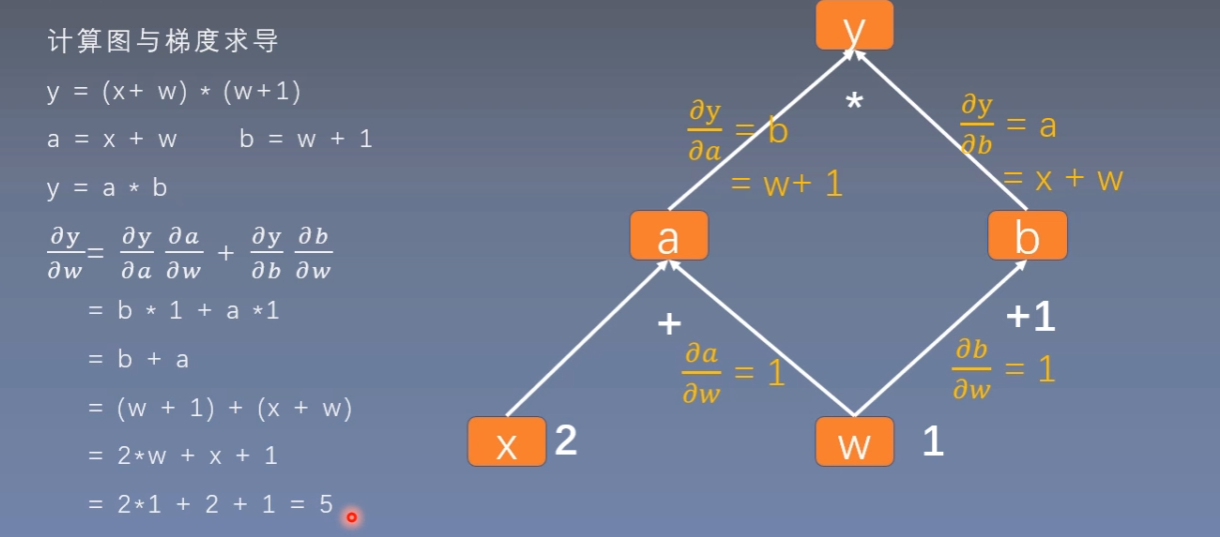

<font color = red size=4>注意：is_leaf属性表示张量是否为叶子节点，设置叶子节点的用处就是为了节省内存，在计算图更新一遍结束后，除了叶子结点的值，其他的变量的值都会被释放，上图中的x和w就是叶子节点，梯度计算结束后把值保存到张量的grad属性中</font>

叶子节点就是我们创建的节点：我们创建的tensor

In [56]:
w=torch.tensor([1.],requires_grad=True)
x=torch.tensor([2.],requires_grad=True)
a=torch.add(x,w)
b=torch.add(w,1)
y=torch.mul(a,b)
y.backward()
print(w.grad)
# 查看叶子节点
print("is_leaf:",w.is_leaf,x.is_leaf,a.is_leaf,b.is_leaf)

# 查看梯度：看看非叶子节点的梯度会不会被保存
# print("gradient:",w.grad,x.grad,a.grad,b.grad)

tensor([5.])
is_leaf: True True False False


###  05、动态图
- 动态图：运算和搭建同时进行（pytorch）
- 静态图：先搭建后运算（tensorflow）
- 举个例子：当我们去旅行，如果是我们自驾游，就类似与动态图，如果跟团旅行，就类似与静态图（一切都是规划好的）

###  06、自动求导（torch.autograd）
- 在pytorch中我们不需要手动去计算导数公式，我们只需要进行前向传播的搭建，然后调用pytorch中的函数来自动求导

####  torch.autograd.backward()
backward(tensors,grad_tensors=None,retain_graph=None,create_graph=False):自动求导梯度
- tensors：用于求导的张量，例如：loss
- grad_tensors：多梯度权重设置
- retain_graph=None：保存计算图（当我们想求两次梯度的时候就要保存计算图）
- create_graph=False：创建导数计算图，用于高阶求导

####  torch.autograd.grad
grad(outputs,inputs,grad_outputs=None,retain_graph=None,create_graph=False):求取梯度

- outputs：用于求导的张量，例如：loss
- inputs：需要梯度的张量
- grad_outputs：多梯度权重设置
- retain_graph=None：保存计算图（当我们想求两次梯度的时候就要保存计算图）
- create_graph=False：创建导数计算图，用于高阶求导

In [60]:
# 二次求导
x=torch.tensor([3.],requires_grad=True)
y=torch.pow(x,2)

grad_1=torch.autograd.grad(y,x,create_graph=True) # 需要二次求导，我们要创建导数的计算图
print(grad_1)
grad_2=torch.autograd.grad(grad_1[0],x)
print(grad_2)

(tensor([6.], grad_fn=<MulBackward0>),)
(tensor([2.]),)


####  Tips
- 梯度不会自动清零，也就是每次计算的梯度会自动叠加，因此我们要手动清零
- 依赖于叶子结点的节点，requires_grad=True
- 叶子结点不可执行in-place操作
- 带下划线的函数都执行in-place操作
- in-place操作：修改原始内存中的数据，类似于深拷贝

In [64]:
# 演示一下in-place操作:看看内存地址变化
a=torch.tensor([1.])
print(id(a),a)

a=a+torch.tensor([1.])
print(id(a),a)

a+=torch.tensor([1.])
print(id(a),a)

2560513945672 tensor([1.])
2560514530984 tensor([2.])
2560514530984 tensor([3.])


###  07、逻辑回归
- 线性的二分类模型
- 模型表达式：y=f(wx+b)  f(x)=sigmod()   sigmod函数也称为logistic函数
- 当模型输出的值大于0.5，我们就预测是真，小于0.5，我们就预测为假

线性回归和逻辑回归的对比：
- 线性回归是分析：自变量x与因变量y（标量）之间关系的方法
- 逻辑回归是分析：自变量x与因变量y（概率）之间关系的方法
- 线性回归+激活函数=逻辑回归

机器学习模型训练步骤：
- 数据：预处理
- 模型：函数
- 损失函数：均方差，交叉熵等
- 优化器：设置学习率，如何更新权值
- 进行迭代更新

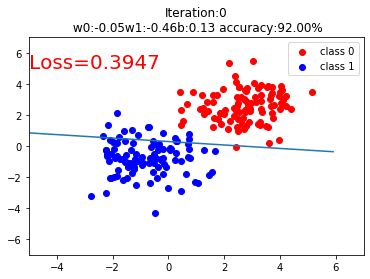

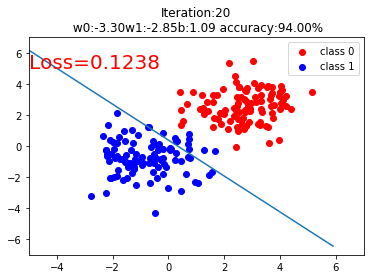

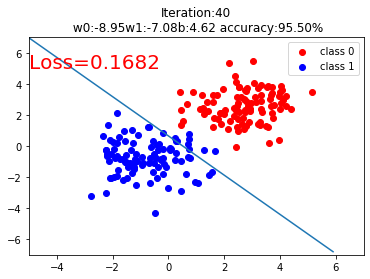

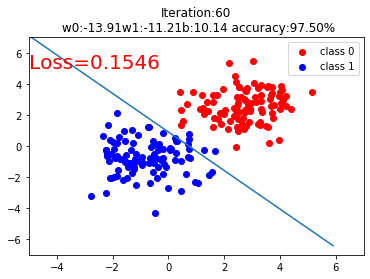

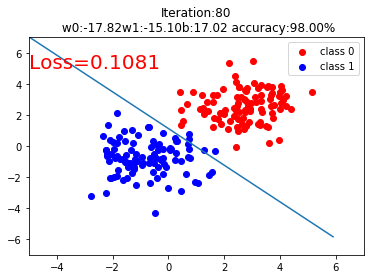

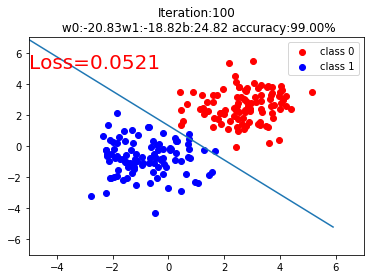

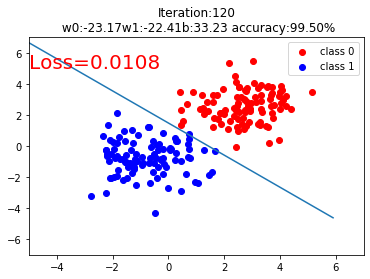

In [69]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(10)
#=====================step1：生成数据====================
sample_nums=100
mean_value=1.7
bias=1
n_data=torch.ones(sample_nums,2)
x0=torch.normal(mean_value*n_data,1)+bias  # 类别0 数据：shape=（100,2）
y0=torch.zeros(sample_nums)                # 类别0 标签：shape=（100,1）
x1=torch.normal(-mean_value*n_data,1)+bias # 类别1 数据：shape=（100,2）
y1=torch.ones(sample_nums)                # 类别1 标签：shape=（100,1）
train_x=torch.cat((x0,x1),0)
train_y=torch.cat((y0,y1),0)

#=====================step2：选择模型====================
class LR(nn.Module):
    def __init__(self):
        super(LR,self).__init__()
        self.features=nn.Linear(2,1)
        self.sigmoid=nn.Sigmoid()
    def forward(self,x):
        x=self.features(x)
        x=self.sigmoid(x)
        return x
lr_net=LR()  #实例化逻辑回归模型

#=====================step3：选择损失函数====================
loss_fn=nn.BCELoss()

#=====================step4：选择优化器====================
lr=0.01
optimizer=torch.optim.SGD(lr_net.parameters(),lr=lr,momentum=0.9)

#=====================step5：模型训练====================
for iteration in range(1000):
    # 前向传播
    y_pred=lr_net(train_x)
    
    # 计算loss
    loss=loss_fn(y_pred.squeeze(),train_y)
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    optimizer.step()
    
    # 绘图
    if iteration % 20==0:
        mask=y_pred.ge(0.5).float().squeeze() # 依0.5为界限：大于0.5为1，小于0.5为0
        correct=(mask==train_y).sum()  # 计算正确预测样本数
        acc=correct.item()/train_y.size(0)  # 计算分类准确率
        
        plt.scatter(x0.data.numpy()[:,0],x0.data.numpy()[:,1],c='r',label='class 0')
        plt.scatter(x1.data.numpy()[:,0],x1.data.numpy()[:,1],c='b',label='class 1')
        
        w0,w1=lr_net.features.weight[0]
        w0,w1=float(w0.item()),float(w1.item())
        
        plot_b=float(lr_net.features.bias[0].item())
        plot_x=np.arange(-6,6,0.1)
        plot_y=(-w0*plot_x-plot_b)/w1
        
        plt.xlim(-5,7)
        plt.ylim(-7,7)
        plt.plot(plot_x,plot_y)
        
        plt.text(-5,5,'Loss=%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.title("Iteration:{}\n w0:{:.2f}w1:{:.2f}b:{:.2f} accuracy:{:.2%}".format(iteration,w0,w1,plot_b,acc))
        plt.legend()
        
        plt.show()
        plt.pause(0.5)
        if acc>0.99:
            break      